# 라이브러리 불러오기 & 데이터 불러오기

In [9]:
import os
import pandas as pd
import numpy as np

In [2]:
os.chdir(r'C:\Users\User\LearningSpoons\파이썬 머신러닝\4-2 실습 파일\data')
data = pd.read_csv("bank-additional-full.csv", sep=';') # ,가 아니라 :로 구분되어있으므로 구분자 넣어주기

In [3]:
data.head()   

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# 범주형 변수 -> 원핫인코딩
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome'])

In [8]:
data['y'].value_counts()  
#범주형 변수라서 분류해야 하는데 설명하기 어려워서 회귀로 만들기 위해 숫자로 변환함

no     36548
yes     4640
Name: y, dtype: int64

In [10]:
data['y'] = np.where( data['y'] =='no', 0 ,1)

In [11]:
data['y'].value_counts()  

0    36548
1     4640
Name: y, dtype: int64

In [12]:
# 학습에 활용할 input 변수를 지정합니다.
input_var = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

# 2. Xgboost 학습시키기

In [15]:
from xgboost import XGBRegressor

xgb = XGBRegressor( n_estimators = 300, learning_rate=0.1 )

In [17]:
xgb.fit(data[input_var], data['y'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# 3. Shap Value 활용
1) 변수중요도

In [18]:
! pip install shap  #anaconda에서는 install -c conda-forge shap

In [19]:
import shap

In [22]:
explainer = shap.TreeExplainer(xgb)

In [23]:
shap_values = explainer.shap_values(data[input_var])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


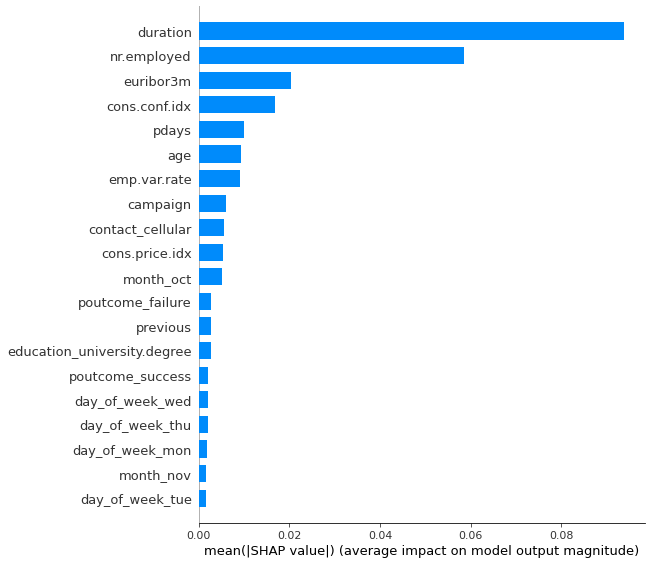

In [24]:
shap.summary_plot( shap_values, data[input_var], plot_type='bar')

duration, nr.employed, euribor3m   3가지가 가장 중요함

2) dependence plot

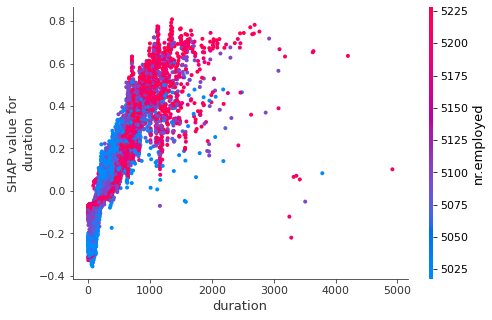

In [27]:
shap.dependence_plot( 'duration', shap_values, data[input_var])
# 500 이하알 경우 0일 가능성이 큼

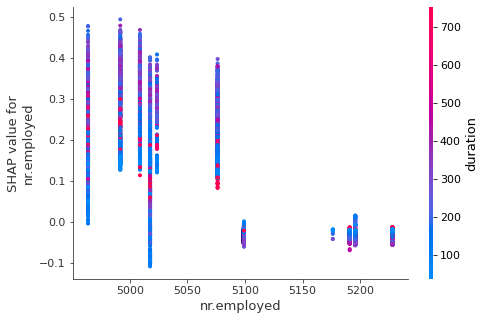

In [28]:
shap.dependence_plot( 'nr.employed', shap_values, data[input_var])
# nr.employed가 5000을 넘어가면 y가 0일 가능성이 높음

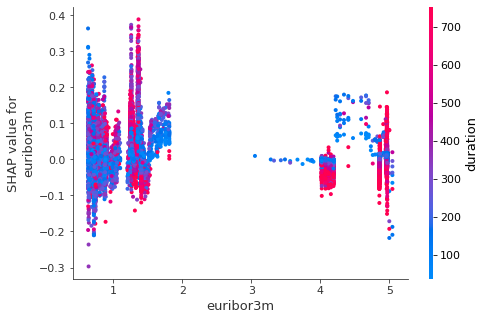

In [29]:
shap.dependence_plot( 'euribor3m', shap_values, data[input_var])
#4-5 사이에 있을때 y값이 1일 가능성이큼

3) force plot

In [31]:
prediction = xgb.predict(data[input_var])

In [32]:
data['pred'] = prediction

In [33]:
data['pred']

0        0.000357
1       -0.001140
2        0.000747
3       -0.000208
4        0.002844
           ...   
41183    0.882677
41184    0.342715
41185    0.092818
41186    0.964269
41187    0.093736
Name: pred, Length: 41188, dtype: float32

In [ ]:
shap.initjs()  #자바스크립트 활용
shap.force_plot( explainer.expected_value, shap_values[41186], data[input_var].iloc[41186])